# Step 1: Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

In [3]:
df = pd.read_csv('/content/Liver Patient Dataset.csv')
print(df.head())
# No liver disease then:=0 for having liver disease then:=1

   ID  Age of the patient Gender of the patient  Total Bilirubin  \
0   1                  65                Female              0.7   
1   2                  62                  Male             10.9   
2   3                  62                  Male              7.3   
3   4                  58                  Male              1.0   
4   5                  72                  Male              3.9   

   Direct Bilirubin   Alkphos Alkaline Phosphotase  \
0               0.1                            187   
1               5.5                            699   
2               4.1                            490   
3               0.4                            182   
4               2.0                            195   

    Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                            16.0                               18   
1                            64.0                              100   
2                            60.0                       

In [4]:
df.shape

(27166, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27166 entries, 0 to 27165
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    27166 non-null  int64  
 1   Age of the patient                    27166 non-null  int64  
 2   Gender of the patient                 27159 non-null  object 
 3   Total Bilirubin                       27165 non-null  float64
 4   Direct Bilirubin                      27166 non-null  float64
 5    Alkphos Alkaline Phosphotase         27166 non-null  int64  
 6    Sgpt Alamine Aminotransferase        27165 non-null  float64
 7   Sgot Aspartate Aminotransferase       27166 non-null  int64  
 8   Total Protiens                        27166 non-null  float64
 9    ALB Albumin                          27166 non-null  float64
 10  A/G Ratio Albumin and Globulin Ratio  27166 non-null  float64
 11  Result         

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,27166.0,13583.500000,7842.293043,1.0,6792.25,13583.5,20374.75,27166.0
Age of the patient,27166.0,44.123868,15.970800,4.0,33.00,45.0,55.00,90.0
Total Bilirubin,27165.0,3.410042,6.346651,0.4,0.80,1.0,2.70,75.0
Direct Bilirubin,27166.0,1.541405,2.894752,0.1,0.20,0.3,1.30,19.7
Alkphos Alkaline Phosphotase,27166.0,290.124273,239.564787,63.0,175.00,209.0,298.00,2110.0
Sgpt Alamine Aminotransferase,27165.0,81.268875,181.549429,10.0,23.00,36.0,62.00,2000.0
Sgot Aspartate Aminotransferase,27166.0,112.085364,283.576290,10.0,26.00,42.0,88.00,4929.0
Total Protiens,27166.0,6.472587,1.081525,2.7,5.80,6.6,7.20,9.6
ALB Albumin,27166.0,3.124019,0.792367,0.9,2.60,3.1,3.70,5.5
A/G Ratio Albumin and Globulin Ratio,27166.0,0.943546,0.324216,0.3,0.70,0.9,1.10,2.8


# Step 2: Data

In [7]:
df['Total Bilirubin'].value_counts()


,count
Total Bilirubin,
0.8,4099
0.7,3575
0.9,2576
0.6,2142
1.0,1386
...,...
4.9,42
14.1,41
14.5,40


In [8]:

df['Total Protiens'].value_counts()

,count
Total Protiens,
7.0,1513
6.0,1394
6.8,1346
6.9,1199
6.2,1082
7.1,1040
7.2,996
8.0,909
6.4,870


In [9]:
df['Result'].value_counts()

,count
Result,
1,19484
0,7682


# Step 3: Exploratory Data Analysis

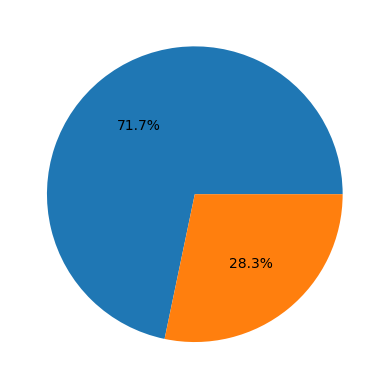

In [10]:
plt.pie(df['Result'].value_counts().values, autopct='%1.1f%%')
plt.show()

In [11]:
ints = []
objects = []
floats = []

for col in df.columns:
    if df[col].dtype == int:
        ints.append(col)
    elif df[col].dtype == object:
        objects.append(col)
    else:
        floats.append(col)

In [12]:
for col in ['ID', 'Result']:
    if col in ints: ints.remove(col)
    if col in floats: floats.remove(col)

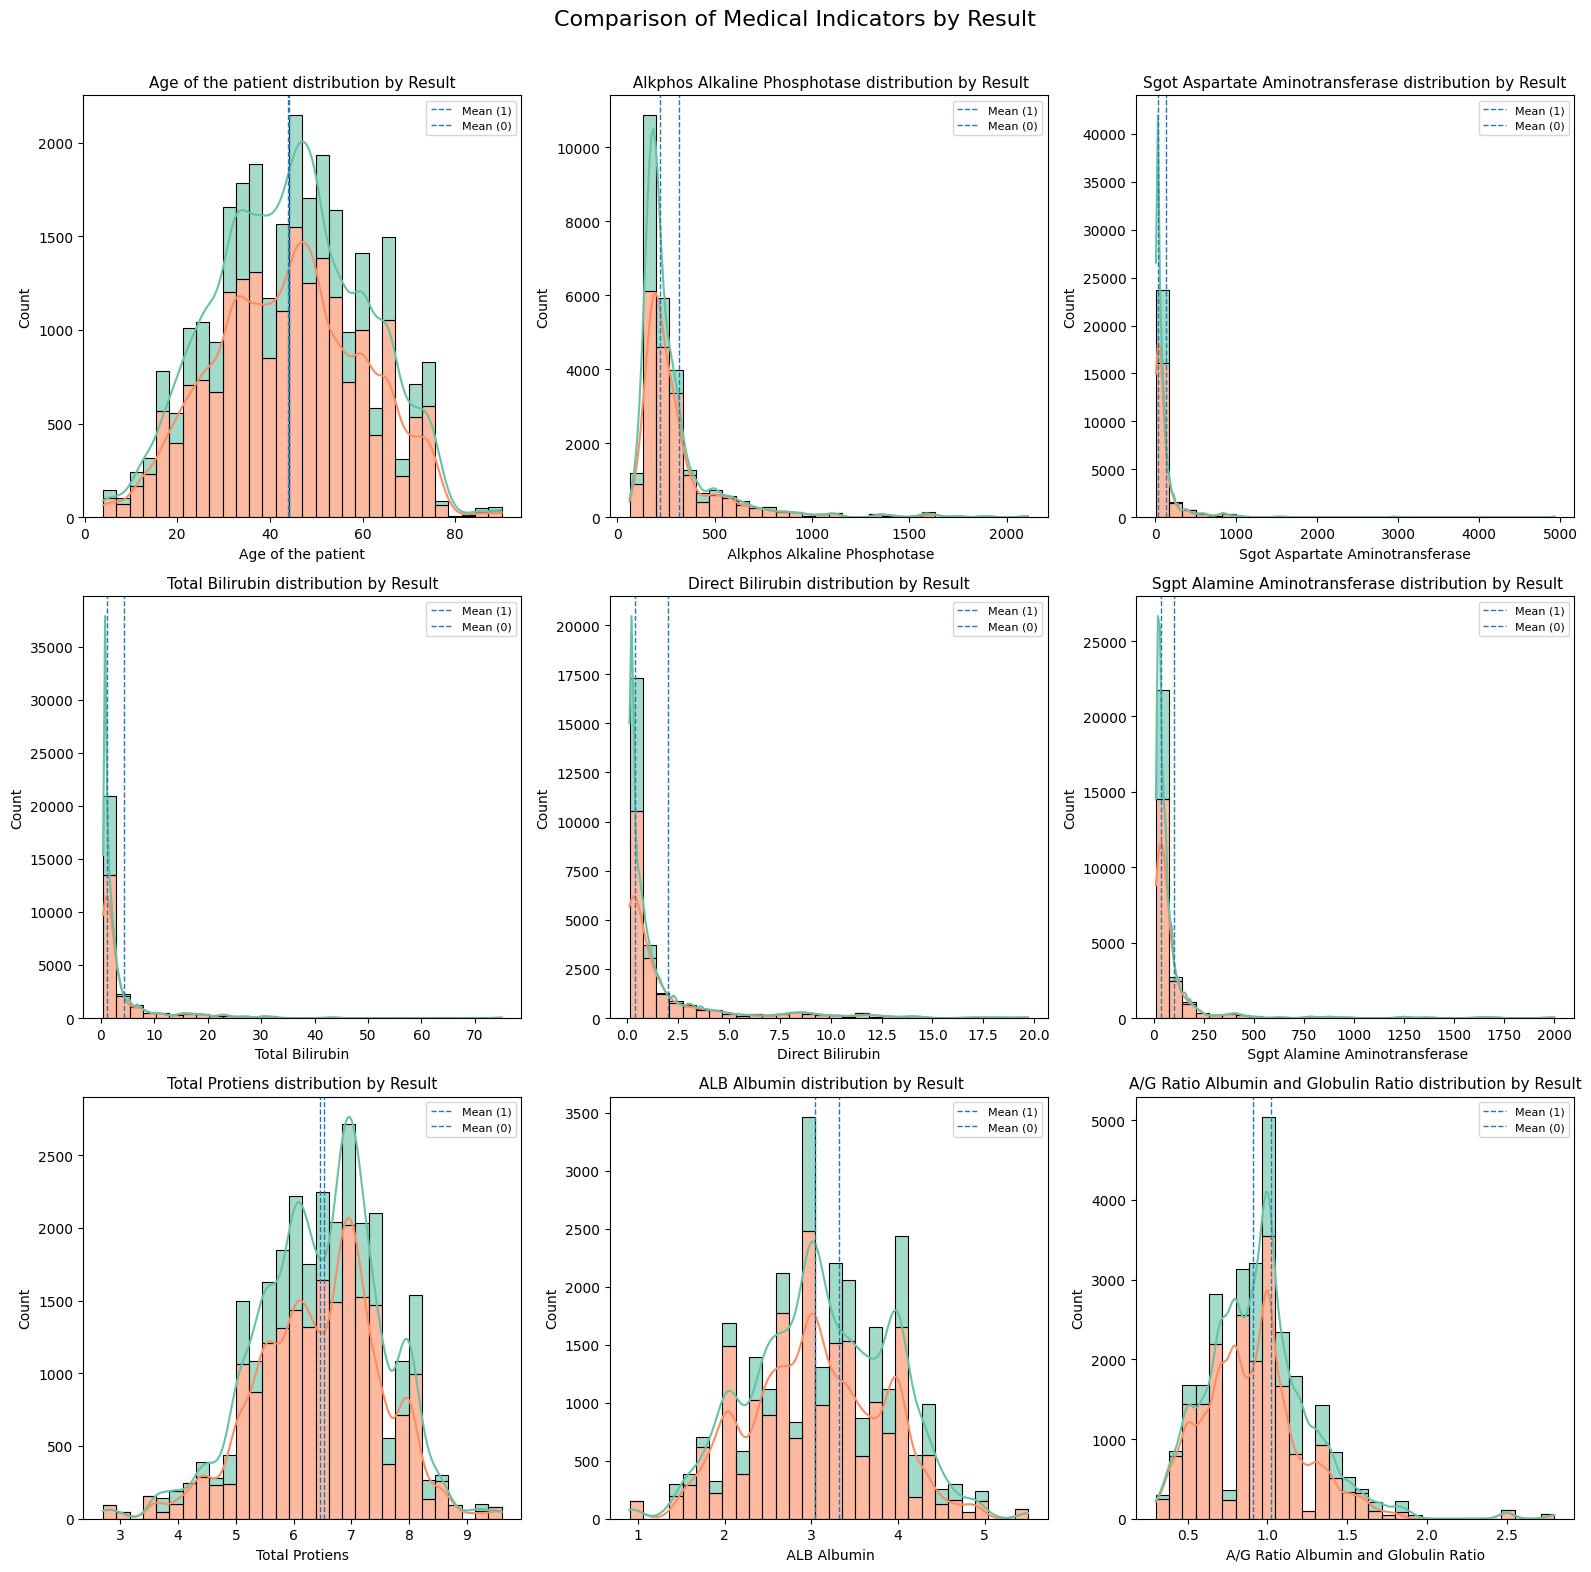

In [13]:
# Combine ints and floats for plotting
numeric_cols = ints + floats

# Plotting
plt.figure(figsize=(16, 16))
palette = sb.color_palette("Set2", n_colors=2)

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sb.histplot(data=df, x=col, hue='Result', kde=True,
                multiple='stack', bins=30, palette=palette, alpha=0.6)

    # Plot vertical lines showing means per class
    for result_class in df['Result'].unique():
        mean_val = df[df['Result'] == result_class][col].mean()
        plt.axvline(mean_val, linestyle='--', label=f'Mean ({result_class})', linewidth=1)

    plt.title(f'{col} distribution by Result', fontsize=11)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(fontsize=8, loc='upper right')

plt.suptitle("Comparison of Medical Indicators by Result", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

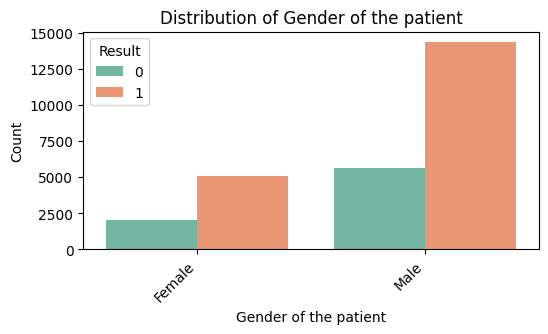

In [14]:
palette = sb.color_palette("Set2", n_colors=2)

plt.figure(figsize=(15, 15))  # Main figure size

# Loop over categorical columns
for i, col in enumerate(objects):
    plt.subplot(5, 3, i + 1)  # Adjust subplot layout (5 rows, 3 columns)
    sb.countplot(x=col, hue='Result', data=df, palette=palette)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Count plots for different A/G Ratio Albumin and Globulin Ratio given in the dataset

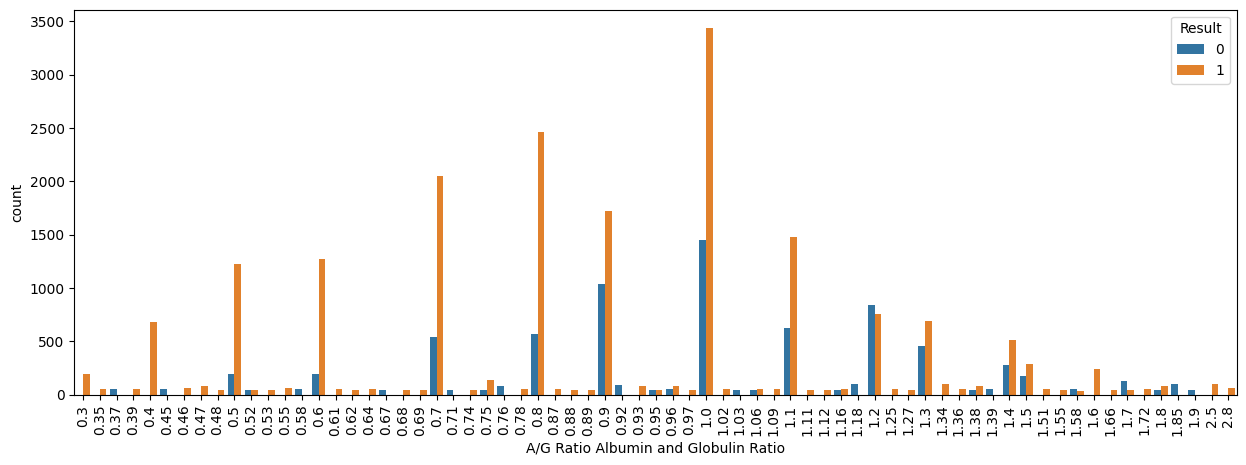

In [15]:
plt.figure(figsize=(15,5))
sb.countplot(data=df, x='A/G Ratio Albumin and Globulin Ratio', hue='Result')
plt.xticks(rotation=90)
plt.show()

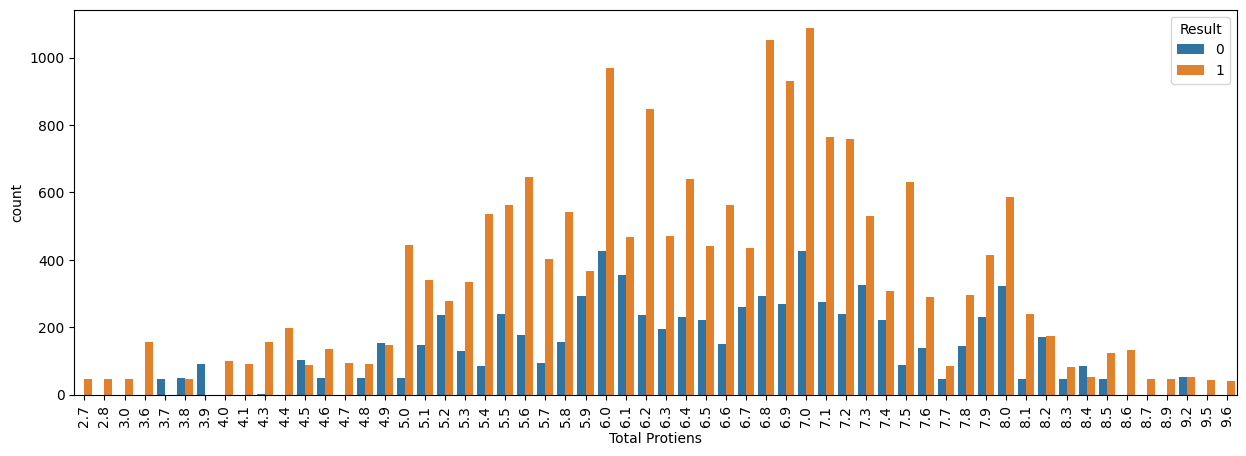

In [16]:
plt.figure(figsize=(15,5))
sb.countplot(data=df, x='Total Protiens', hue='Result')
plt.xticks(rotation=90)
plt.show()

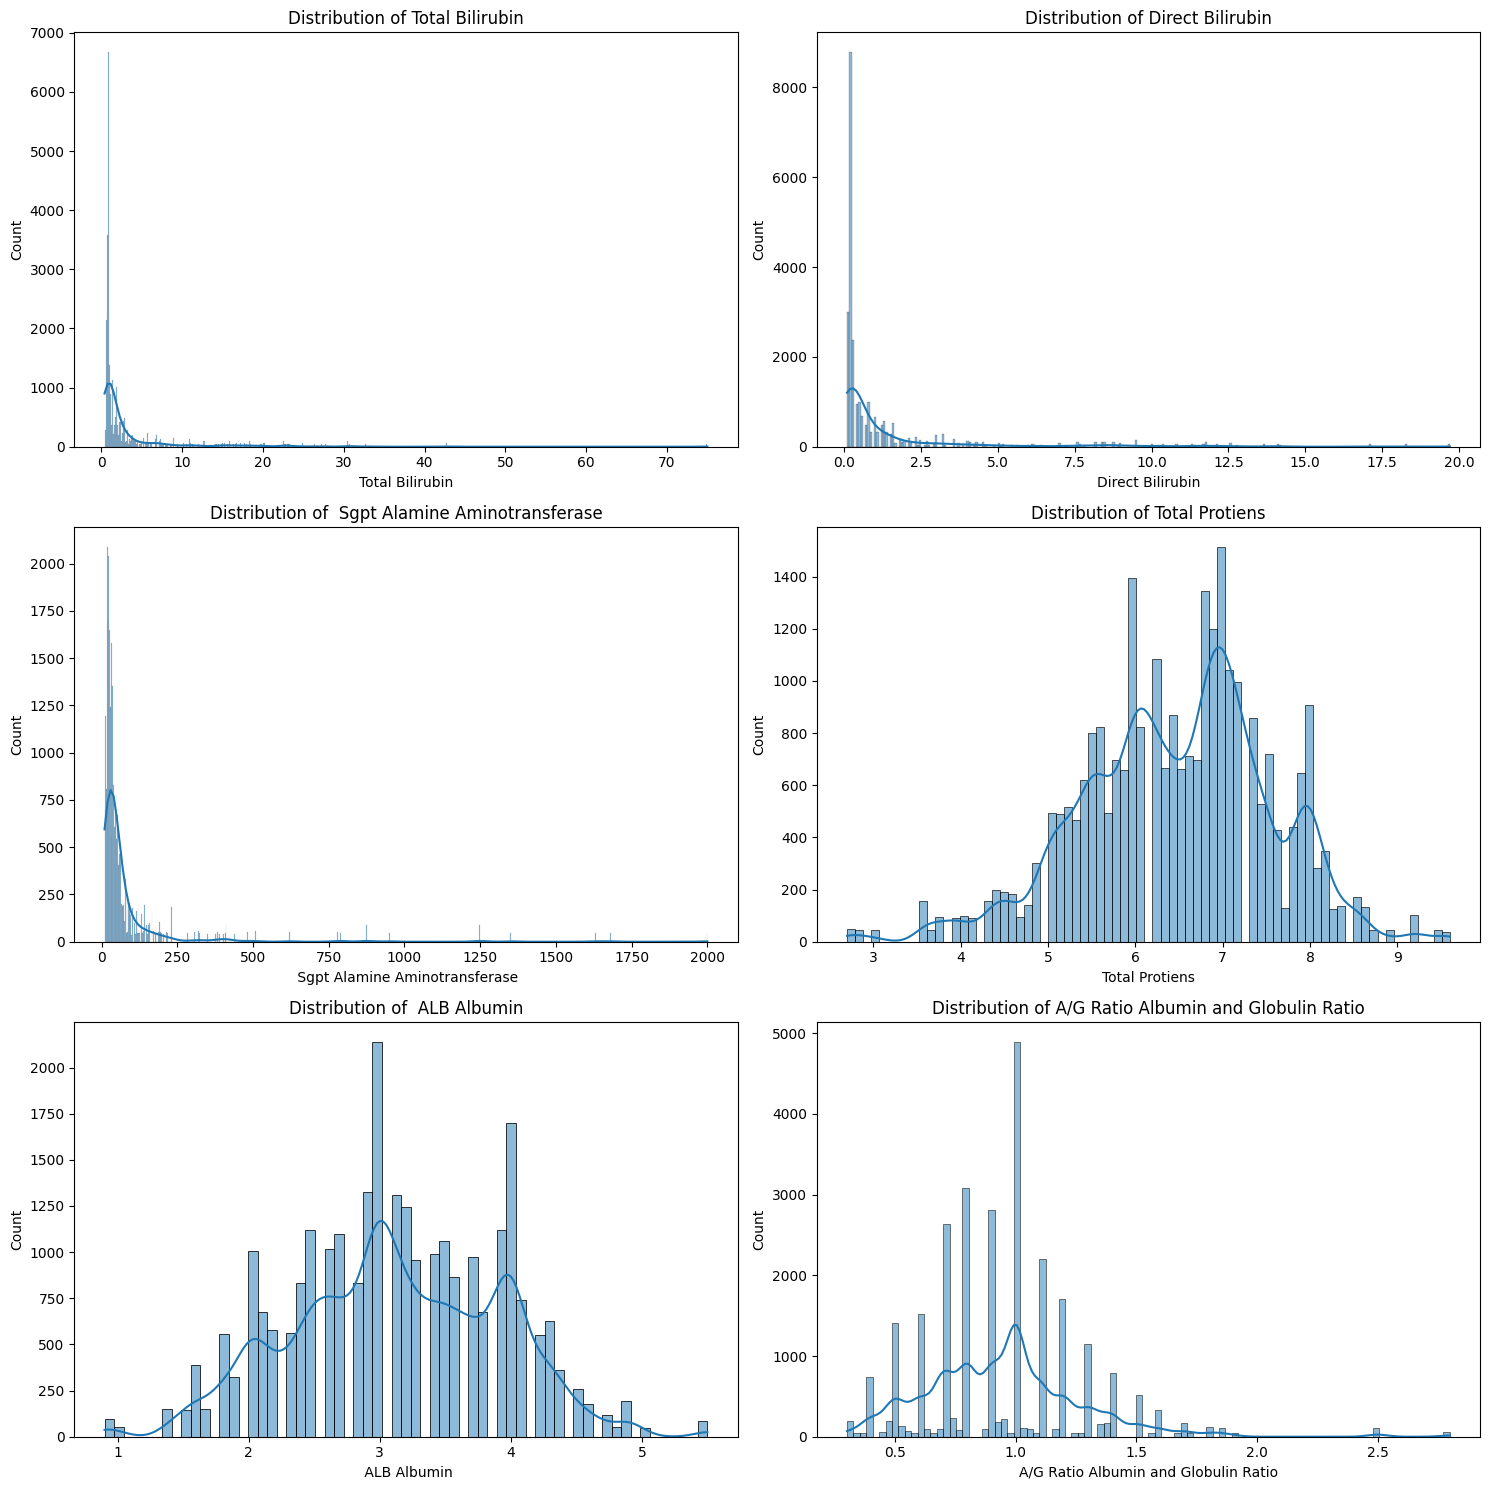

In [17]:
# Adjust figure size
plt.figure(figsize=(15, 5 * len(floats) // 2))  # dynamically adjust based on number of float columns

# Loop through each float column
for i, col in enumerate(floats):
    plt.subplot((len(floats) + 1) // 2, 2, i + 1)  # Automatically arrange subplots in 2 columns
    sb.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

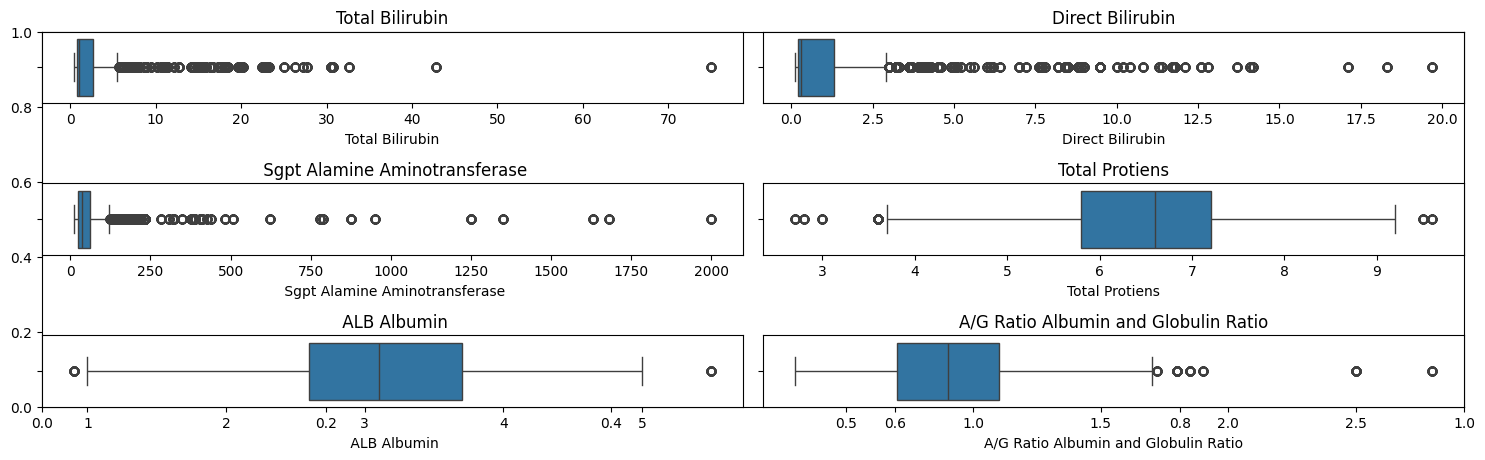

In [18]:
plt.subplots(figsize=(15, 5))

for i, col in enumerate(floats):
    plt.subplot((len(floats) + 1) // 2, 2, i + 1)
    sb.boxplot(x=df[col])  # Corrected: use x= for single variable
    plt.title(col)

plt.tight_layout()
plt.show()

In [19]:
# Define medically relevant age groups
def convertAge(age):
    if age < 18:
        return 'Child'
    elif age < 36:
        return 'Young Adult'
    elif age < 56:
        return 'Middle-aged Adult'
    else:
        return 'Older Adult'

# Apply the function to create a new column
df['ageGroup'] = df['Age of the patient'].apply(convertAge)


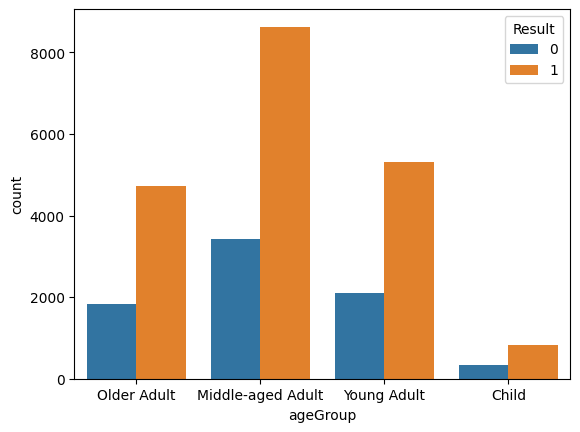

In [20]:
sb.countplot(x=df['ageGroup'], hue=df['Result'])
plt.show()

In [21]:
# Applying log transformations to remove the skewness of the data.
df['Age of the patient'] = df['Age of the patient'].apply(lambda x: np.log(x))

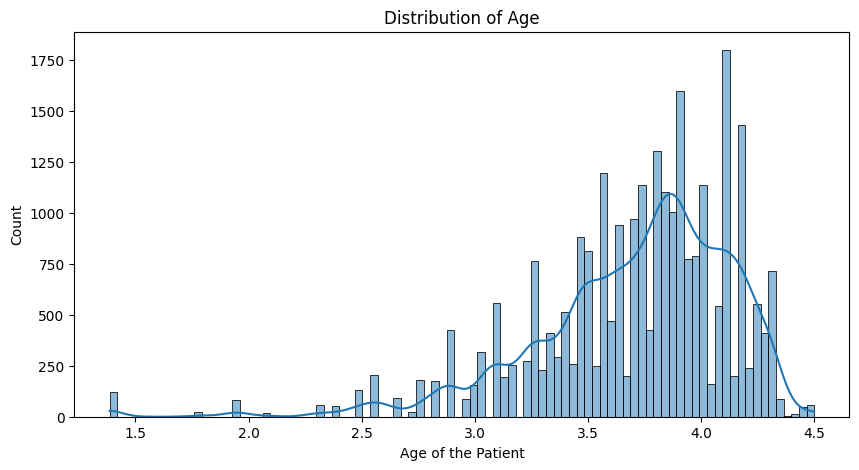

In [22]:
plt.figure(figsize=(10, 5))
sb.histplot(df['Age of the patient'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age of the Patient')
plt.show()

# Step 4 : correlation matrix

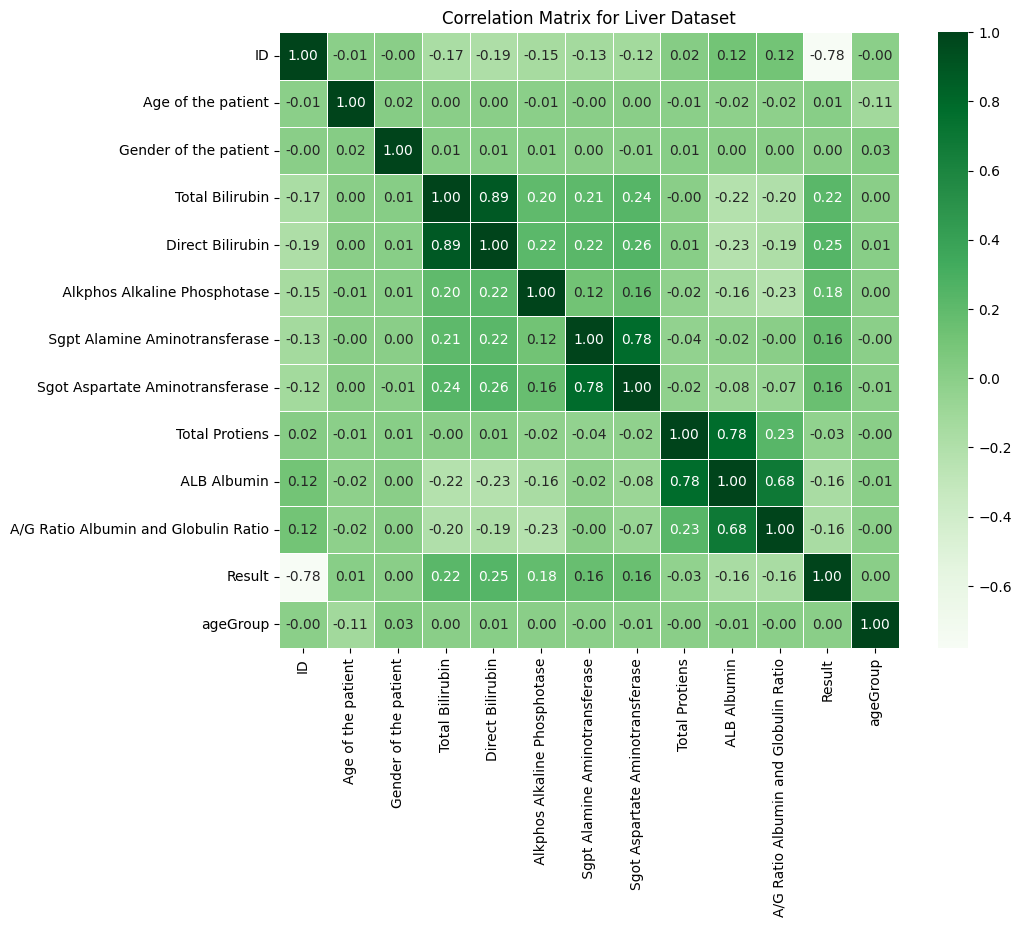

In [23]:
# Calculateing correlation matrix
def encode_labels(df):
    for column in df.select_dtypes(include=['object']).columns:
        if column != 'Result':  # Assuming you don't want to encode the target column
            df[column] = LabelEncoder().fit_transform(df[column])
    return df

df = encode_labels(df)  # Encode before computing correlation

# Calculate and plot the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Liver Dataset")
plt.show()

In [24]:
#check for null value
df.isnull().sum()

,0
ID,0
Age of the patient,0
Gender of the patient,0
Total Bilirubin,1
Direct Bilirubin,0
Alkphos Alkaline Phosphotase,0
Sgpt Alamine Aminotransferase,1
Sgot Aspartate Aminotransferase,0
Total Protiens,0
ALB Albumin,0


In [25]:
df= df.dropna()
df.isnull().sum()

,0
ID,0
Age of the patient,0
Gender of the patient,0
Total Bilirubin,0
Direct Bilirubin,0
Alkphos Alkaline Phosphotase,0
Sgpt Alamine Aminotransferase,0
Sgot Aspartate Aminotransferase,0
Total Protiens,0
ALB Albumin,0


In [26]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27164 entries, 0 to 27165
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    27164 non-null  int64  
 1   Age of the patient                    27164 non-null  float64
 2   Gender of the patient                 27164 non-null  int64  
 3   Total Bilirubin                       27164 non-null  float64
 4   Direct Bilirubin                      27164 non-null  float64
 5    Alkphos Alkaline Phosphotase         27164 non-null  int64  
 6    Sgpt Alamine Aminotransferase        27164 non-null  float64
 7   Sgot Aspartate Aminotransferase       27164 non-null  int64  
 8   Total Protiens                        27164 non-null  float64
 9    ALB Albumin                          27164 non-null  float64
 10  A/G Ratio Albumin and Globulin Ratio  27164 non-null  float64
 11  Result              

# Step 5: Model Training

In [27]:
# Load datasets
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Input
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping



train_df = pd.read_csv("/content/Liver Patient Dataset.csv")
test_df = pd.read_csv("/content/test.csv")

In [28]:

# 1. Clean column names
train_df.columns = train_df.columns.str.strip().str.replace('Â', '').str.replace('\u00a0', '')
test_df.columns = test_df.columns.str.strip().str.replace('Â', '').str.replace('\u00a0', '')

# 2. Drop ID column
if 'ID' in train_df.columns:
    train_df.drop(columns=["ID"], inplace=True)
if 'ID' in test_df.columns:
    test_df.drop(columns=["ID"], inplace=True)

# 3. Encode Gender
le = LabelEncoder()
train_df['Gender of the patient'] = le.fit_transform(train_df['Gender of the patient'])
test_df['Gender of the patient'] = le.transform(test_df['Gender of the patient'])

# 4. Separate features and target
X = train_df.drop(columns=['Result'])
y = train_df['Result'].astype(int)

# 5. Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
test_imputed = imputer.transform(test_df)

# 6. Normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
test_scaled = scaler.transform(test_imputed)


# 6. Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [29]:
print(train_df.columns.tolist())

['Age of the patient', 'Gender of the patient', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio', 'Result']


In [30]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy:.4f}")

# Predict on test data
predictions = model.predict(test_scaled)
predicted_classes = (predictions > 0.5).astype(int)

# Save predictions
output = test_df.copy()
output['Predicted_Result'] = predicted_classes


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7112 - loss: 0.5357 - val_accuracy: 0.7194 - val_loss: 0.4920
Epoch 2/100
680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7190 - loss: 0.4914 - val_accuracy: 0.7153 - val_loss: 0.4809
Epoch 3/100
680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7263 - loss: 0.4743 - val_accuracy: 0.7205 - val_loss: 0.4656
Epoch 4/100
680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7168 - loss: 0.4684 - val_accuracy: 0.7214 - val_loss: 0.4491
Epoch 5/100
680/680 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7190 - loss: 0.4562 - val_accuracy: 0.7315 - val_loss: 0.4315
Epoch 6/100
680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7276 - loss: 0.4355 - val_accuracy: 0.7440 - val_loss: 0.4176
Epoch 7/100
680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7398 - loss: 0.4274 - val_accuracy: 0.7626 - val_loss: 0.3933
Epoch 8/100
680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7551 - loss: 0.4097 - val_accu

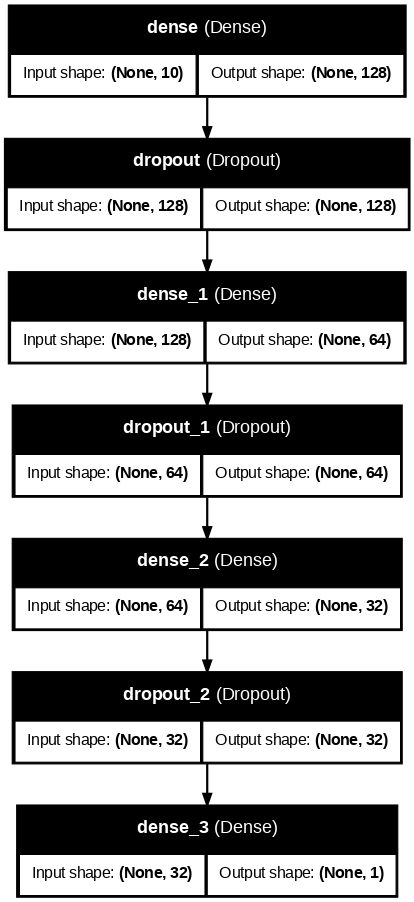

In [42]:
# Imports
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import seaborn as sns
import pandas as pd
from IPython.display import Image, display


# 1.Model architecture inline

plot_model(model, to_file='dnn_model.png', show_shapes=True, show_layer_names=True, dpi=80)

# Display the model architecture image inline
display(Image('dnn_model.png'))





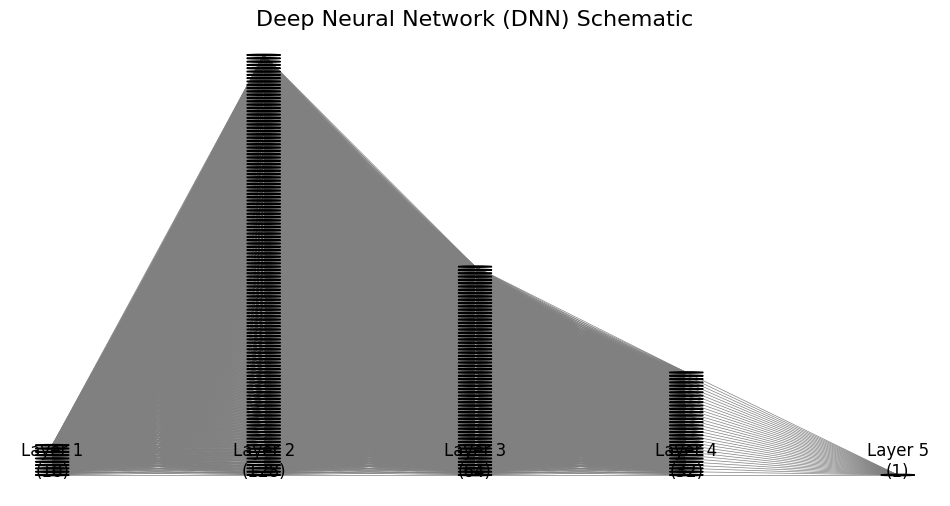

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Function to draw a simple DNN
def draw_dnn(layer_sizes):
    """
    layer_sizes: list of integers, number of neurons in each layer
    Example: [10, 128, 64, 32, 1] -> input:10, hidden1:128, hidden2:64, hidden3:32, output:1
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axis('off')

    v_spacing = 1.0
    h_spacing = 2.5

    # Coordinates for neurons
    neuron_positions = []
    for i, n_neurons in enumerate(layer_sizes):
        layer_y = np.linspace(0, v_spacing*(n_neurons-1), n_neurons)
        layer_x = np.ones(n_neurons) * i * h_spacing
        neuron_positions.append(list(zip(layer_x, layer_y)))
        # Draw neurons
        for x, y in zip(layer_x, layer_y):
            circle = plt.Circle((x, y), 0.2, fill=True, color='skyblue', ec='k', zorder=4)
            ax.add_artist(circle)

    # Draw connections
    for (layer1, layer2) in zip(neuron_positions[:-1], neuron_positions[1:]):
        for (x1, y1) in layer1:
            for (x2, y2) in layer2:
                ax.plot([x1, x2], [y1, y2], 'gray', lw=0.5, zorder=1)

    # Labels for layers
    for i, layer_size in enumerate(layer_sizes):
        ax.text(i * h_spacing, -0.5, f'Layer {i+1}\n({layer_size})', ha='center', fontsize=12)

    plt.title("Deep Neural Network (DNN) Schematic", fontsize=16)
    plt.show()

# Example for your updated model: input -> 128 -> 64 -> 32 -> 1 output
# Replace 10 with the actual number of features in your training data
input_size = X_train.shape[1]  # Adjust based on your data
draw_dnn([input_size, 128, 64, 32, 1])


170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


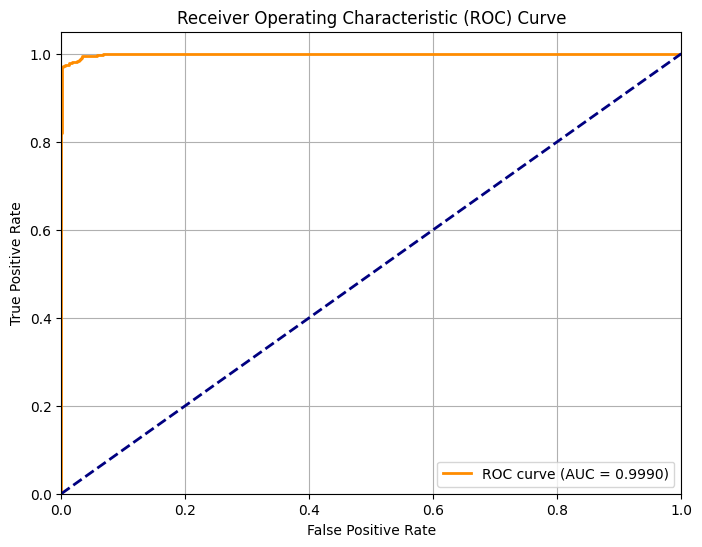

ROC AUC Score: 0.9990


In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities (not class labels)
y_val_probs = model.predict(X_val).ravel()  # Use ravel() to flatten from (n,1) to (n,)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, y_val_probs)
print(f"ROC AUC Score: {auc_score:.4f}")


In [32]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

#  1. Convert probability predictions to class labels
y_val_pred = (y_val_probs >= 0.5).astype(int)


# 3. Classification Report
report = classification_report(y_val, y_val_pred, target_names=["Negative", "Positive"])
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

    Negative       0.95      0.98      0.97      1529
    Positive       0.99      0.98      0.99      3905

    accuracy                           0.98      5434
   macro avg       0.97      0.98      0.98      5434
weighted avg       0.98      0.98      0.98      5434



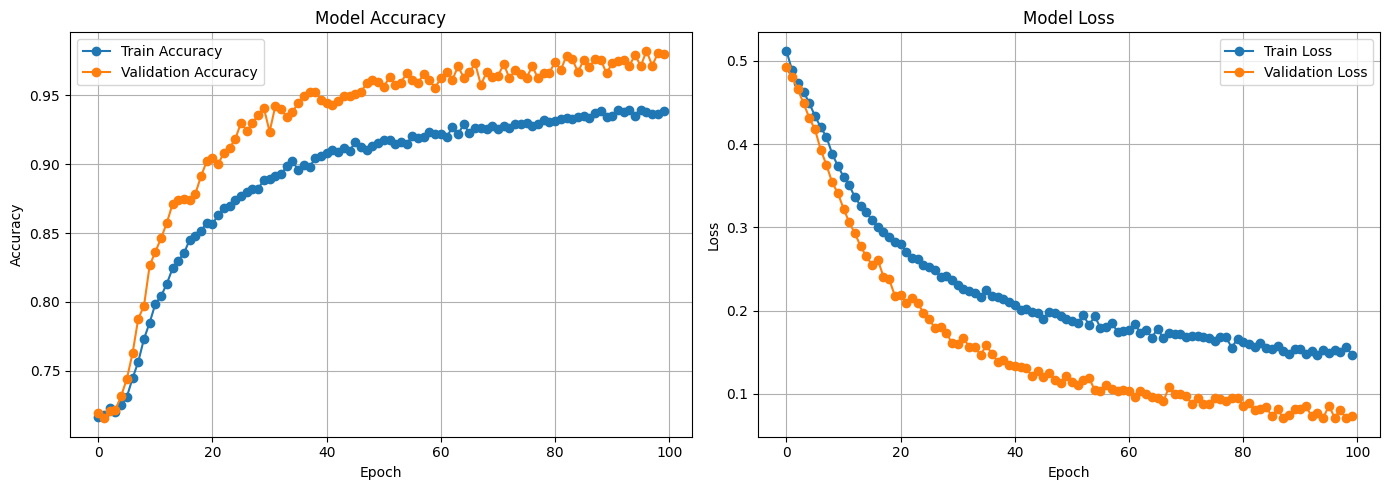

In [43]:
# 2. Plot training history (accuracy & loss)

plt.figure(figsize=(14,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [34]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy:.4f}")

predictions = model.predict(test_scaled)
predicted_classes = (predictions > 0.5).astype(int)

output = test_df.copy()
output['Predicted_Result'] = predicted_classes
output.to_csv("liver_test_predictions.csv", index=False)


170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9825 - loss: 0.0701
Validation Accuracy: 0.9807
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [35]:
model.save("liver_model.keras")


In [36]:
# Save the scaler
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [37]:
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [ ]:
# Deployed: 
#                       https://liver-disease-predictor-frma.onrender.com/